In [1]:
import networkx as nx
from networkx.readwrite import json_graph
import json
import os
from tqdm import tqdm
import time
import random
import statistics
import pandas as pd
from nltk.tokenize import wordpunct_tokenize
from transformers import BertTokenizer
from collections import Counter
import re

In [2]:
JSON_DIRECTORY =  'D:\Диплом_текстовые_квесты\Data\graphs\online_games_questbook_graphs_json'
BOOKS_JSON_DIRECTORY = 'D:\Диплом_текстовые_квесты\Data\questbook_graphs — копия'

In [60]:
num_starts = []
for json_file in os.listdir(JSON_DIRECTORY):
    file_path = os.path.join(JSON_DIRECTORY, json_file)
    G = json_graph.node_link_graph(json.load(open(file_path, encoding='utf-8')))
    nodes = G.nodes()
    starts = [node for node in nodes if G.in_degree(node) == 0]
    real_starts = [nodes[start]['fragment_text'] for start in starts if nodes[start]['fragment_text']]
    num_starts.append(len(real_starts))

In [92]:
#0 starts mean, that there are edges, which connect the end of the quest and its beginning. 
#>1 starts mean, that some edges were not detected during parsing.
#Most of the quests seem to be parsed in a proper way
num_starts

[2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 3,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 11,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [95]:
len(num_starts)

180

In [93]:
len([num_quest_starts for num_quest_starts in num_starts if num_quest_starts == 1])

141

In [3]:
def random_walk_paths(G, num_paths=75, time_limit=0, min_path_len=4):
    nodes = G.nodes()
    edges = G.edges()

    
    found_paths = []
    found_paths_string_representations = set()
    
    from_node2to_node = {}
    for from_node, to_node in edges:
        if from_node not in from_node2to_node:
            from_node2to_node[from_node] = []
        if 'fragment_text' in nodes[to_node]:
            from_node2to_node[from_node].append(to_node)
    
    starts = [node for node in nodes if G.in_degree(node) == 0]
    real_starts = [start for start in starts if start in from_node2to_node]
    
    if real_starts:
        start_time = time.time()
        while len(found_paths)<num_paths and (not time_limit or time.time()-start_time<time_limit):
            current_path = []
            next_node_options = real_starts
            start_next = False
            while next_node_options:
                not_cycled_next_node_options = [option for option in next_node_options if option not in current_path]
                if not not_cycled_next_node_options:
                    next_node_options = []
                else:
                    current_node = random.choice(not_cycled_next_node_options)
                    current_path.append(current_node)
                    if current_node in from_node2to_node:
                        next_node_options = from_node2to_node[current_node]
                    else:
                        next_node_options = []
                        if len(current_path) >= min_path_len:
                            current_path_string_representation = '_'.join([str(step_id) for step_id in current_path])
                            if current_path_string_representation not in found_paths_string_representations:
                                found_paths_string_representations.add(current_path_string_representation)
                                found_paths.append(current_path)
    return found_paths

In [4]:
RANDOM_PATHS_DIRECTORY = 'D:\\Диплом_текстовые_квесты\\random_paths'

BOOKS_RANDOM_PATHS_DIRECTORY = os.path.join('D:', 'Диплом_текстовые_квесты', 'Data', 'book_paths')


In [7]:
for graph_file in tqdm(os.listdir(JSON_DIRECTORY)):
    graph_path = os.path.join(JSON_DIRECTORY, graph_file)
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    random_paths = random_walk_paths(G, num_paths=75, time_limit=5*60, min_path_len=4)
    random_paths_file = os.path.join(RANDOM_PATHS_DIRECTORY, graph_file)
    with open(random_paths_file, 'w', encoding='utf-8') as f:
        json.dump(random_paths, f)

100%|█████████████████████████████████████████████████████████████████████████████| 180/180 [6:12:20<00:00, 124.12s/it]


In [8]:
NEW_JSON_DIRECTORY  = 'D:\\Диплом_текстовые_квесты\\Data\\new_questbook_graphs'
NEW_RANDOM_PATHS_DIRECTORY = 'D:\\Диплом_текстовые_квесты\\Data\\new_questbook_paths'

In [7]:
for graph_file in tqdm(os.listdir(NEW_JSON_DIRECTORY)):
    graph_path = os.path.join(NEW_JSON_DIRECTORY, graph_file)
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    random_paths = random_walk_paths(G, num_paths=75, time_limit=5*60, min_path_len=4)
    random_paths_file = os.path.join(NEW_RANDOM_PATHS_DIRECTORY, graph_file)
    with open(random_paths_file, 'w', encoding='utf-8') as f:
        json.dump(random_paths, f)

100%|███████████████████████████████████████████████████████████████████████████████| 34/34 [1:10:01<00:00, 123.58s/it]


In [14]:
for graph_file in tqdm(os.listdir(BOOKS_JSON_DIRECTORY)):
    graph_path = os.path.join(BOOKS_JSON_DIRECTORY, graph_file)
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    random_paths = random_walk_paths(G, num_paths=75, time_limit=5*60, min_path_len=4)
    random_paths_file = os.path.join(BOOKS_RANDOM_PATHS_DIRECTORY, graph_file)
    with open(random_paths_file, 'w', encoding='utf-8') as f:
        json.dump(random_paths, f)


100%|██████████████████████████████████████████████████████████████████████████████| 169/169 [3:55:17<00:00, 83.53s/it]


In [5]:
def graph2transitions_dict(G):
    from_node2to_node = {}
    nodes = G.nodes()
    edges = G.edges()
    for from_node, to_node in edges:
        if from_node not in from_node2to_node:
            from_node2to_node[from_node] = []
        if 'fragment_text' in nodes[to_node]:
            from_node2to_node[from_node].append(to_node)
    return from_node2to_node



In [10]:
def stringify_quest_path(quest_path,
                   G, 
                   G_transitions_dict, 
                   quest_start_token='BOQ',
                   fragment_start_token='BOF',
                   option_start_token='BUTTON',
                   user_input_token='INPUT',
                   quest_end_token='EOQ',
                   separator = '\n',
                   unknown_choise_probability=0.1,
                   empty_transition_text='Далее'): 
    nodes = G.nodes()
    edges = G.edges()
    real_quest_path = [fragment for fragment in quest_path if 'fragment_text' in nodes[fragment] and nodes[fragment]['fragment_text']]
    text_items = [quest_start_token]
    for i, node_id in enumerate(real_quest_path[:-1]):
        text_items.append(fragment_start_token)
        text_items.append(nodes[node_id]['fragment_text'])
        if i < len(real_quest_path)-1:
            possible_next_nodes_ids = G_transitions_dict[node_id] if node_id in G_transitions_dict else []
            if random.random() < unknown_choise_probability:
                possible_next_nodes_ids = [possible_id for possible_id in possible_next_nodes_ids if possible_id != quest_path[i+1]]
            transition_texts = []
            for possible_next_node_id in possible_next_nodes_ids:
                transition = (node_id, possible_next_node_id)
                if transition in edges and 'command' in transition:
                    transition_text = edges[transition]["command"]
                    if transition_text.strip():
                        transition_texts.append(transition_text)
                if not transition_texts:
                    transition_texts = [empty_transition_text]
            for transition_text in transition_texts:
                text_items.append(option_start_token)
                text_items.append(transition_text)
            if i < len(real_quest_path)-2:
                next_node_id = real_quest_path[i+1]
                transition = (node_id, next_node_id)
                transition_text = ''
                if transition in edges and 'command' in edges[transition]:
                    transition_text= edges[(node_id, next_node_id)]["command"]
                    if not transition_text:
                        transition_text = empty_transition_text
            text_items.append(transition_text)
            text_items.append(user_input_token)
            text_items.append(transition_text)
    text_items.append(quest_end_token)
    return separator.join(text_items)
        

In [58]:
RANDOM_PATHS_TEXTS_DIR = 'D:\\Диплом_текстовые_квесты\\quest_book_online_random_paths_text'

In [59]:
import re

In [ ]:
for file in tqdm(os.listdir(RANDOM_PATHS_DIRECTORY)):
    data_path = os.path.join(RANDOM_PATHS_DIRECTORY, file)
    with open(data_path, encoding='utf-8') as f:
        quest_paths = json.load(f)
    if quest_paths:
        
        quest_paths_dir_name = re.sub('\.', '_', file)
        quest_paths_dir_path = os.path.join(RANDOM_PATHS_TEXTS_DIR, quest_paths_dir_name)
        if quest_paths_dir_name not in os.listdir(RANDOM_PATHS_TEXTS_DIR):
            os.mkdir(quest_paths_dir_path)
        
        graph_path = os.path.join(JSON_DIRECTORY, file)
        G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
        transition_dict = graph2transitions_dict(G)
        
        for i, quest_path in enumerate(quest_paths):
            text = stringify_quest_path(quest_path, G, transition_dict)
            if text:
                text_file = os.path.join(quest_paths_dir_path, str(i)+'.txt')
                with open(text_file, 'w', encoding='utf-8') as f:
                    f.write(text)

In [21]:
NEW_PATHS_TEXTS_DIRECTORY = 'D:\\Диплом_текстовые_квесты\\Data\\new_text_paths'

In [16]:
def stringify_quest_path(quest_path,
                   G, 
                   G_transitions_dict, 
                   quest_start_token='BOQ',
                   fragment_start_token='BOF',
                   option_start_token='BUTTON',
                   user_input_token='INPUT',
                   quest_end_token='EOQ',
                   separator = '\n',
                   unknown_choise_probability=0.1,
                   empty_transition_text='Далее'): 
    nodes = G.nodes()
    edges = G.edges()
    real_quest_path = [fragment for fragment in quest_path if 'fragment_text' in nodes[fragment] and nodes[fragment]['fragment_text']]
    text_items = [quest_start_token]
    for i, node_id in enumerate(real_quest_path):
        text_items.append(fragment_start_token)
        text_items.append(nodes[node_id]['fragment_text'])
        if i < len(quest_path)-1:
            possible_next_nodes_ids = G_transitions_dict[node_id] if node_id in G_transitions_dict else []
            if random.random() < unknown_choise_probability:
                possible_next_nodes_ids = [possible_id for possible_id in possible_next_nodes_ids if possible_id != quest_path[i+1]]
            transition_texts = []
            for possible_next_node_id in possible_next_nodes_ids:
                transition = (node_id, possible_next_node_id)
                if transition in edges and 'command' in transition:
                    transition_text = edges[transition]["command"]
                    if transition_text.strip():
                        transition_texts.append(transition_text)
                if not transition_texts:
                    transition_texts = [empty_transition_text]
            for transition_text in transition_texts:
                text_items.append(option_start_token)
                text_items.append(transition_text)
            if i < len(real_quest_path)-2:
                next_node_id = real_quest_path[i+1]
                transition = (node_id, next_node_id)
                transition_text = ''
                if transition in edges and 'command' in edges[transition]:
                    transition_text= edges[(node_id, next_node_id)]["command"]
                if not transition_text:
                    transition_text = empty_transition_text
                text_items.append(transition_text)
                text_items.append(user_input_token)
                text_items.append(transition_text)
    text_items.append(quest_end_token)
    return separator.join(text_items)
        

In [ ]:
for file in tqdm(os.listdir(NEW_RANDOM_PATHS_DIRECTORY)):
    data_path = os.path.join(NEW_RANDOM_PATHS_DIRECTORY, file)
    try:
        with open(data_path, encoding='utf-8') as f:
            quest_paths = json.load(f)
            print(len(quest_paths))
    except Exception as e:
        print(e)

In [ ]:
for file in tqdm(os.listdir(NEW_RANDOM_PATHS_DIRECTORY)):
    data_path = os.path.join(NEW_RANDOM_PATHS_DIRECTORY, file)
    try:
        with open(data_path, encoding='utf-8') as f:
            quest_paths = json.load(f)
    except Exception as e:
        print(e)
        quest_paths = []
    if quest_paths:
        
        quest_paths_dir_name = re.sub('\.', '_', file)
        quest_paths_dir_path = os.path.join(NEW_RANDOM_PATHS_DIRECTORY, quest_paths_dir_name)
        print(quest_paths_dir_path)
        if quest_paths_dir_name not in os.listdir(NEW_PATHS_TEXTS_DIRECTORY):
            os.mkdir(quest_paths_dir_path)
        
        graph_path = os.path.join(NEW_JSON_DIRECTORY, file)
        G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
        transition_dict = graph2transitions_dict(G)
        
        for i, quest_path in enumerate(quest_paths):
            text = stringify_quest_path(quest_path, G, transition_dict)
            if text:
                text_file = os.path.join(quest_paths_dir_path, str(i)+'.txt')
                with open(text_file, 'w', encoding='utf-8') as f:
                    f.write(text)

In [12]:
def collect_random_paths_len(random_paths_directory):
    mean_path_lengths = []
    for graph_paths_file in os.listdir(random_paths_directory):
        current_graph_paths = json.load(open(os.path.join(random_paths_directory, graph_paths_file), encoding='utf-8'))
        if current_graph_paths:
            mean_path_lengths.append(statistics.mean([len(path) for path in current_graph_paths]))
    return pd.Series(mean_path_lengths)
    

In [16]:
online_quests_mean_lengths = collect_random_paths_len(RANDOM_PATHS_DIRECTORY)

In [17]:
book_quests_mean_lengths = collect_random_paths_len(BOOKS_RANDOM_PATHS_DIRECTORY)

In [19]:
online_quests_mean_lengths.describe()

count    163.000000
mean      21.595032
std       25.807107
min        4.500000
25%       10.450000
50%       15.106667
75%       22.706316
max      213.893333
dtype: float64

In [20]:
book_quests_mean_lengths.describe()

count    143.000000
mean      13.977010
std       10.141911
min        4.000000
25%        7.900000
50%       11.906667
75%       15.846667
max       66.893333
dtype: float64

In [26]:
joined_mean_paths_lengths = pd.DataFrame(columns = ['mean_length', 'quest_type'])
for online_quest_mean_length in online_quests_mean_lengths:
    joined_mean_paths_lengths.loc[len(joined_mean_paths_lengths)] = [online_quest_mean_length, 'online']
for book_quest_mean_length in book_quests_mean_lengths:
    joined_mean_paths_lengths.loc[len(joined_mean_paths_lengths)] = [book_quest_mean_length, 'book']

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


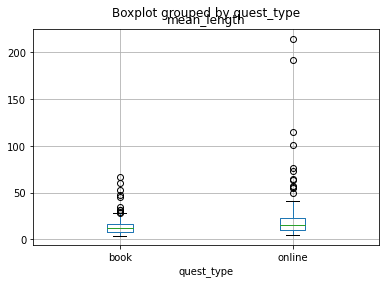

In [30]:
joined_mean_paths_lengths.boxplot(column='mean_length', by='quest_type')

In [110]:
def get_number_of_nodes(graph_path):
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    nodes = G.nodes()
    return len([node for node in nodes if 'fragment_text' in nodes[node] and isinstance(nodes[node]['fragment_text'], str) and nodes[node]['fragment_text'].strip()])

In [111]:
num_nodes = pd.DataFrame(columns=['num_nodes', 'quest_type'])
for online_quest_file in os.listdir(JSON_DIRECTORY):
    num_nodes.loc[len(num_nodes)] = [get_number_of_nodes(os.path.join(JSON_DIRECTORY, online_quest_file)), 'online']
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    num_nodes.loc[len(num_nodes)] = [get_number_of_nodes(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file)), 'book']

In [112]:
num_nodes['num_nodes'] = pd.to_numeric(num_nodes['num_nodes'])

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


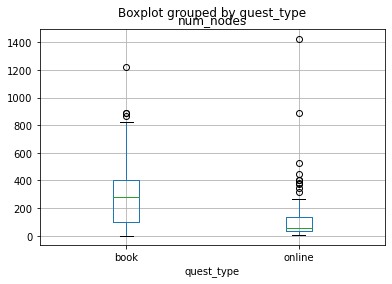

In [113]:
num_nodes.boxplot(column='num_nodes', by='quest_type')

In [49]:
num_nodes[num_nodes['quest_type']=='online']['num_nodes'].describe()

count     180.000000
mean      106.627778
std       148.447723
min         4.000000
25%        35.750000
50%        60.000000
75%       133.250000
max      1427.000000
Name: num_nodes, dtype: float64

In [68]:
num_nodes[num_nodes['quest_type']=='book']['num_nodes'].describe()

count     169.000000
mean      317.946746
std       232.522509
min        10.000000
25%       115.000000
50%       302.000000
75%       401.000000
max      1228.000000
Name: num_nodes, dtype: float64

In [8]:
def get_valid_nodes(nodes):
    return [node for node in nodes if 'fragment_text' in nodes[node] and isinstance(nodes[node]['fragment_text'], str) and nodes[node]['fragment_text'].strip()]

In [14]:
def calc_mean_text_len_nltk(graph_path):
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    fragment_lens = []
    nodes = G.nodes()
    for node in nodes:
        if 'fragment_text' in nodes[node] and isinstance(nodes[node]['fragment_text'], str) and nodes[node]['fragment_text'].strip():
            num_tokens_exc_punct = len([token for token in wordpunct_tokenize(nodes[node]['fragment_text']) if re.search('[а-яА-Яa-zA-Z]', token)])
            fragment_lens.append(num_tokens_exc_punct)
    return statistics.mean(fragment_lens)

In [40]:
num_tokens_nltk = pd.DataFrame(columns=['num_tokens', 'quest_type'])
for online_quest_file in os.listdir(JSON_DIRECTORY):
    num_tokens_nltk.loc[len(num_tokens_nltk)] = [calc_mean_text_len_nltk(os.path.join(JSON_DIRECTORY, online_quest_file)), 'online']
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    num_tokens_nltk.loc[len(num_tokens_nltk)] = [calc_mean_text_len_nltk(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file)), 'book']

In [17]:
num_tokens_nltk[num_tokens_nltk['quest_type']=='online']['num_tokens'].describe()

count    180.000000
mean      91.971665
std       78.680742
min       15.887850
25%       45.387261
50%       76.193237
75%      122.944343
max      599.185185
Name: num_tokens, dtype: float64

In [41]:
outlier_threshold = 1500.0
book_tokens_nltk = num_tokens_nltk[num_tokens_nltk['quest_type']=='book']
book_tokens_nltk[book_tokens_nltk['num_tokens']<outlier_threshold]['num_tokens'].describe()

count     165.000000
mean       99.105517
std       123.640856
min        15.634146
25%        51.392857
50%        68.548673
75%       100.256617
max      1353.300000
Name: num_tokens, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


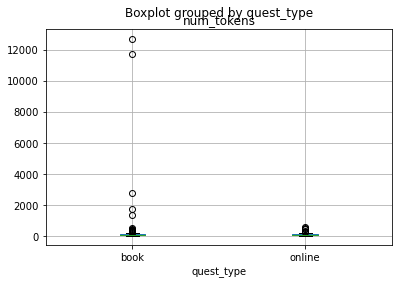

In [19]:
num_tokens_nltk.boxplot(column='num_tokens', by='quest_type')

In [3]:
bert_tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [12]:
def calc_mean_text_len_bert(graph_path):
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    nodes = G.nodes()
    valid_nodes = get_valid_nodes(nodes)
    return statistics.mean([len(bert_tokenizer.encode(nodes[node]['fragment_text'])) for node in valid_nodes])

In [17]:
num_tokens_bert = pd.DataFrame(columns=['num_tokens', 'quest_type'])
for online_quest_file in os.listdir(JSON_DIRECTORY):
    num_tokens_bert.loc[len(num_tokens_bert)] = [calc_mean_text_len_bert(os.path.join(JSON_DIRECTORY, online_quest_file)), 'online']
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    num_tokens_bert.loc[len(num_tokens_bert)] = [calc_mean_text_len_bert(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file)), 'book']

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


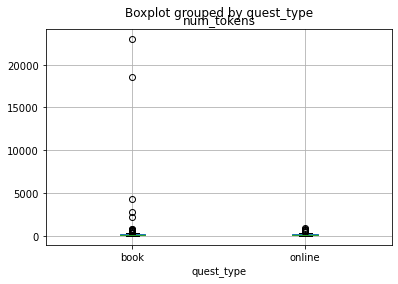

In [18]:
num_tokens_bert.boxplot(column='num_tokens', by='quest_type')

In [19]:
num_tokens_bert[num_tokens_bert['quest_type']=='online']['num_tokens'].describe()

count    180.000000
mean     145.247366
std      125.687591
min       25.841121
25%       68.410842
50%      113.942485
75%      190.264117
max      951.037037
Name: num_tokens, dtype: float64

In [21]:
outlier_threshold = 2000
book_tokens_bert = num_tokens_bert[num_tokens_bert['quest_type']=='book']
book_tokens_bert[book_tokens_bert['num_tokens']<outlier_threshold]['num_tokens'].describe()

count    164.000000
mean     147.656107
std      121.146959
min       26.111498
25%       85.372720
50%      111.811136
75%      161.204964
max      814.516129
Name: num_tokens, dtype: float64

In [ ]:
num_tokens_bert[num_tokens_bert['quest_type']=='book']['num_tokens'].describe()

In [4]:
def proportion_of_fragments_longer_than_limits(graph_path, limits:list):
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    nodes = G.nodes()
    valid_nodes = get_valid_nodes(nodes)
    fragment_lens = [len(bert_tokenizer.encode(nodes[node]['fragment_text'])) for node in valid_nodes] 
    if not fragment_lens:
        return [0 for limit in limits]
    else:
        proportions = []
        for limit in limits:
            num_larger_fragments = sum([fragment_len > limit for fragment_len in fragment_lens])
            proportions.append(num_larger_fragments/len(fragment_lens))
        return proportions

In [9]:
long_fragments_proportion = pd.DataFrame(columns=['512 tokens', '256 tokens', 'quest_type'])
limits = [512, 256]
for online_quest_file in os.listdir(JSON_DIRECTORY):
    long_fragments_proportion.loc[len(long_fragments_proportion)] = [*proportion_of_fragments_longer_than_limits(os.path.join(JSON_DIRECTORY, online_quest_file), limits), 'online']
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    long_fragments_proportion.loc[len(long_fragments_proportion)] = [*proportion_of_fragments_longer_than_limits(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file), limits), 'book']

In [12]:
long_fragments_proportion.groupby('quest_type').describe()

512 tokens                                                          \
                count      mean       std  min  25%       50%       75%   max   
quest_type                                                                      
book            169.0  0.058892  0.179869  0.0  0.0  0.001359  0.017199  1.00   
online          180.0  0.030661  0.103998  0.0  0.0  0.000000  0.013180  0.75   

           256 tokens                                                         \
                count      mean       std  min       25%       50%       75%   
quest_type                                                                     
book            169.0  0.156451  0.237320  0.0  0.017500  0.059524  0.164062   
online          180.0  0.142669  0.189257  0.0  0.008223  0.075499  0.212818   

                      
                 max  
quest_type            
book        1.000000  
online      0.962963

In [60]:
def calc_mean_in_degree_excluded_zero(graph_path):
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    value = statistics.mean([G.out_degree(node) for node in G.nodes() if G.out_degree(node)])
    return value

In [107]:
out_degree = pd.DataFrame(columns=['mean_out_degree', 'quest_type'])
for online_quest_file in os.listdir(JSON_DIRECTORY):
    out_degree.loc[len(out_degree)] = [calc_mean_in_degree_excluded_zero(os.path.join(JSON_DIRECTORY, online_quest_file)), 'online']
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    value = calc_mean_in_degree_excluded_zero(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file))
    if value < 10:
        out_degree.loc[len(out_degree)] = [value, 'book']

In [108]:
out_degree[out_degree['quest_type']=='online']['mean_out_degree'].describe()

count    180.000000
mean       1.723794
std        0.715439
min        1.100000
25%        1.415441
50%        1.636364
75%        1.890805
max        9.855556
Name: mean_out_degree, dtype: float64

In [109]:
out_degree[out_degree['quest_type']=='book']['mean_out_degree'].describe()

count    165.000000
mean       1.871276
std        0.504591
min        1.000000
25%        1.545279
50%        1.763689
75%        2.127072
max        4.678571
Name: mean_out_degree, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


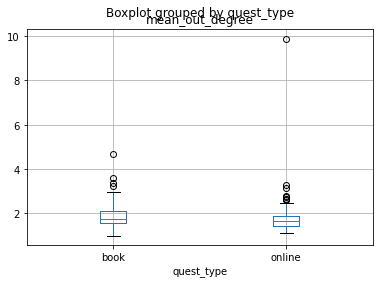

In [115]:
out_degree.boxplot(column='mean_out_degree', by='quest_type')

In [ ]:
out_degree = pd.DataFrame(columns=['mean_out_degree', 'quest_type'])
for online_quest_file in os.listdir(JSON_DIRECTORY):
    out_degree.loc[len(out_degree)] = [calc_mean_in_degree_excluded_zero(os.path.join(JSON_DIRECTORY, online_quest_file)), 'online']
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    out_degree.loc[len(out_degree)] = [calc_mean_in_degree_excluded_zero(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file)), 'book']

In [83]:
def collect_outliers(graph_path):
    G = json_graph.node_link_graph(json.load(open(graph_path, encoding='utf-8')))
    nodes = G.nodes()
    outliers = [(graph_path, node, nodes[node]['fragment_text'], G.out_degree(node)) for node in nodes if G.out_degree(node) > 50]
    return outliers

In [84]:
outliers = []
for book_quest_file in os.listdir(BOOKS_JSON_DIRECTORY):
    outliers+= collect_outliers(os.path.join(BOOKS_JSON_DIRECTORY, book_quest_file))

In [85]:
len(outliers)

4

We are going to remove graphs-outliers from the data, as they are result of parsing errors

In [88]:
[outlier[0] for outlier in outliers]

['D:\\Диплом_текстовые_квесты\\Data\\questbook_graphs — копия\\dafin1.json',
 'D:\\Диплом_текстовые_квесты\\Data\\questbook_graphs — копия\\Fallout II v1.04.5.json',
 'D:\\Диплом_текстовые_квесты\\Data\\questbook_graphs — копия\\Емельянова__Искушение_студента.json',
 'D:\\Диплом_текстовые_квесты\\Data\\questbook_graphs — копия\\Оружие возмездия - книга-игра.json']

# Graph structure (online quests only)

Proportion of nodes, connected in both directions

In [4]:
GRAPHS_DIRECTORY = 'D:\\Диплом_текстовые_квесты\\Data\\questbook_online_joined_texts'

In [17]:
biconnected_df = pd.DataFrame(columns=['num_double_edges', 'num_edges', 'num_nodes'])

for graph_file in os.listdir(GRAPHS_DIRECTORY):
    graph_path = os.path.join(GRAPHS_DIRECTORY, graph_file)
    with open(graph_path, encoding='utf-8') as f:
        G = json_graph.node_link_graph(json.load(f))
    edges = G.edges()
    num_double_edges = 0.5 * len([(node_from, node_to) for node_from, node_to in edges if (node_to, node_from) in edges])
    biconnected_df.loc[len(biconnected_df)] = [num_double_edges, len(edges), len(G.nodes())]

In [26]:
def biconnection_proportion(double_conections, all_connections):
    if not all_connections:
        return 0
    else:
        return double_conections/(all_connections-double_conections)

In [19]:
def proportion_of_real_edges(num_edges, num_nodes):
    num_possible_edges = num_nodes * (num_nodes-1)
    if not num_possible_edges:
        return 0
    else:
        return num_edges/num_possible_edges

In [27]:
biconnected_df['double_connections_proportion'] = biconnected_df.apply(lambda row: biconnection_proportion(row['num_double_edges'], row['num_edges']), axis=1)

In [22]:
biconnected_df['real_edges_proportion'] = biconnected_df.apply(lambda row: proportion_of_real_edges(row['num_edges'], row['num_nodes']), axis=1)

In [28]:
biconnected_df['double_connections_proportion'].describe()

count    180.000000
mean       0.064949
std        0.132498
min        0.000000
25%        0.000000
50%        0.006283
75%        0.071758
max        0.860465
Name: double_connections_proportion, dtype: float64

In [15]:
latex_script = biconnected_df['double_connections_proportion'].describe().to_latex()
with open('D:\\Диплом_текстовые_квесты\\pd2latex_draft.txt', 'w', encoding='utf-8') as f:
    f.write(latex_script)

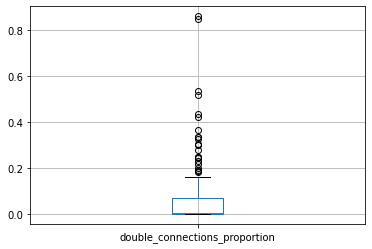

In [16]:
biconnected_df.boxplot(column='double_connections_proportion')

In [31]:
biconnected_df['double_connections_category'] = biconnected_df['double_connections_proportion'].apply(lambda x: '>=0.1 double edges' if x >= 0.1 else '< 0.1 double edges')

C:\Users\user\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


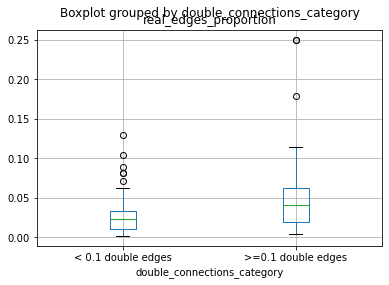

In [34]:
biconnected_df.boxplot(column='real_edges_proportion', by='double_connections_category')

In [39]:
biconnected_df.groupby('double_connections_category')['real_edges_proportion'].describe().transpose()

double_connections_category,< 0.1 double edges,>=0.1 double edges
count,145.000000,35.000000
mean,0.025131,0.057256
std,0.020474,0.059459
min,0.001413,0.004032
25%,0.009838,0.019454
50%,0.022881,0.040404
75%,0.032977,0.062174
max,0.129167,0.250000


In [40]:
latex_script = biconnected_df.groupby('double_connections_category')['real_edges_proportion'].describe().transpose().to_latex()
with open('D:\\Диплом_текстовые_квесты\\pd2latex_draft.txt', 'w', encoding='utf-8') as f:
    f.write(latex_script)

## Number of edges, which should be scored as incorrect during linear sequence ordering, but exist at full quest graph

In [9]:
def calc_false_positives_proportion(order, graph):
    negatives = 0
    false_negatives = 0
    for i, fragment_from_id in enumerate(order):
        for j, fragment_to_id in enumerate(order):
            if j != i+1 and i != j:
                negatives += 1
                if graph.has_edge(fragment_from_id, fragment_to_id):
                    false_negatives += 1
    return false_negatives/negatives
                

In [15]:
false_negatives_df = pd.DataFrame(columns=['linear_false_positives_proportion', 'quest_type'])

for file_name in os.listdir(JSON_DIRECTORY):
    graph_path = os.path.join(JSON_DIRECTORY, file_name)
    with open(graph_path) as f:
        G = json_graph.node_link_graph(json.load(f))
    
    random_paths_path = os.path.join(RANDOM_PATHS_DIRECTORY, file_name)
    with open(random_paths_path) as f:
        random_paths = json.load(f)
        
    for order in random_paths:
        false_negatives_df.loc[len(false_negatives_df)] = [calc_false_positives_proportion(order, G), 'online']


In [16]:
for file_name in os.listdir(BOOKS_JSON_DIRECTORY):
    graph_path = os.path.join(BOOKS_JSON_DIRECTORY, file_name)
    with open(graph_path) as f:
        G = json_graph.node_link_graph(json.load(f))
    
    random_paths_path = os.path.join(BOOKS_RANDOM_PATHS_DIRECTORY, file_name)
    with open(random_paths_path) as f:
        random_paths = json.load(f)
        
    for order in random_paths:
        false_negatives_df.loc[len(false_negatives_df)] = [calc_false_positives_proportion(order, G), 'book']

In [18]:
description = false_negatives_df.groupby('quest_type').describe()
description

linear_false_positives_proportion                                \
                                       count      mean       std  min  25%   
quest_type                                                                   
book                                  9727.0  0.020531  0.039923  0.0  0.0   
online                                8743.0  0.012535  0.025789  0.0  0.0   

                                          
                 50%       75%       max  
quest_type                                
book        0.005102  0.024691  0.612245  
online      0.001953  0.011338  0.222222

In [19]:
with open('D:\\Диплом_текстовые_квесты\\latex.txt', 'w') as f:
    f.write(description.transpose().to_latex())

In [33]:
book_pairs_counts = []

for quest_file in os.listdir(BOOKS_RANDOM_PATHS_DIRECTORY):
    with open(os.path.join(BOOKS_RANDOM_PATHS_DIRECTORY, quest_file)) as f:
        paths = json.load(f)
        quest_counter = Counter()
        for path in paths:
            transitions = [(node_from, node_to) for node_from, node_to in zip(path[:-1], path[1:])]
            quest_counter.update(transitions)
        for pair in quest_counter:
            book_pairs_counts.append(quest_counter[pair])

In [24]:
import matplotlib.pyplot as plt

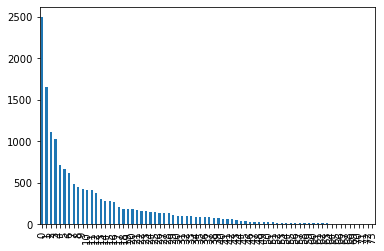

In [32]:
pd.Series(online_pairs_counts).value_counts().plot(kind='bar', use_index=False)

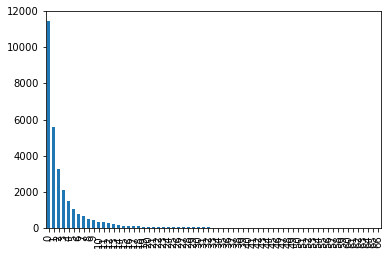

In [34]:
pd.Series(book_pairs_counts).value_counts().plot(kind='bar', use_index=False)